python2 版

In [32]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [50]:
df = pd.read_csv("tmp/testlog.csv",header=None, names = ('time','src','dst','sport','dport','byte'))
df.head()


,time,src,dst,sport,dport,byte
0,1490906170,753914318,1110786557,2911,918,64348
1,1490906170,753914318,1110786557,2911,918,270829
2,1490906170,753914318,1110786557,2911,918,144229
3,1490906170,753914318,1110786557,2911,918,173308
4,1490906170,753914318,1110786557,2911,918,381578


In [52]:
dfg = df.groupby('time')['src'].count()
dfg.head()

time
1490906170    14
1490906171     6
1490906172     5
1490906173     7
1490906174    14
Name: src, dtype: int64

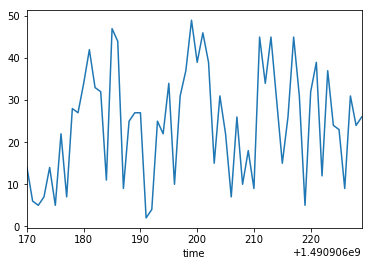

In [53]:
dfg.plot()

In [54]:
df2 = pd.read_csv("tmp/testlog2.csv",header=None, names = ('time','src','dst','sport','dport','byte'))
df2.head()

,time,src,dst,sport,dport,byte
0,1490906170,3557830713,2184534138,2911,918,64348
1,1490906170,3557830713,2184534138,2911,918,270829
2,1490906170,3557830713,2184534138,2911,918,144229
3,1490906170,3557830713,2184534138,2911,918,173308
4,1490906170,3557830713,2184534138,2911,918,381578


In [57]:
dfg2 = df2.groupby('time')['src'].count()
dfg2.head()


time
1490906170    14
1490906171     6
1490906172     5
1490906173     7
1490906174    14
Name: src, dtype: int64

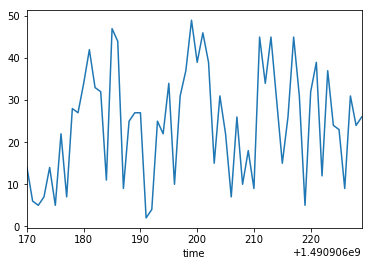

In [58]:
dfg2.plot()

In [60]:
dfg = df.groupby('src')['src'].count()
dfg.head()

src
9297520     7
14612270    3
37351952    7
37876737    3
62281188    2
Name: src, dtype: int64

In [62]:
dfg2 = df2.groupby('src')['src'].count()
dfg2.head()

src
4386996     6
15079220    9
24717654    4
27442060    7
55894452    9
Name: src, dtype: int64

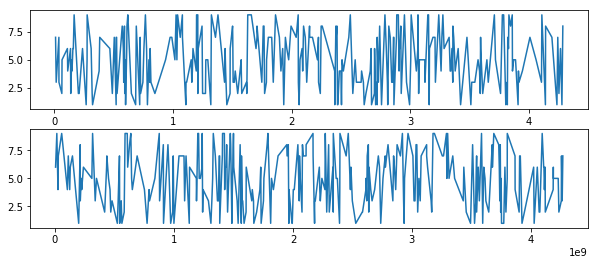

In [87]:
fig, (a, b) = plt.subplots(nrows=2, figsize=(10,4))
a.plot(dfg.index,dfg.values)
b.plot(dfg2.index,dfg2.values)
fig.show()

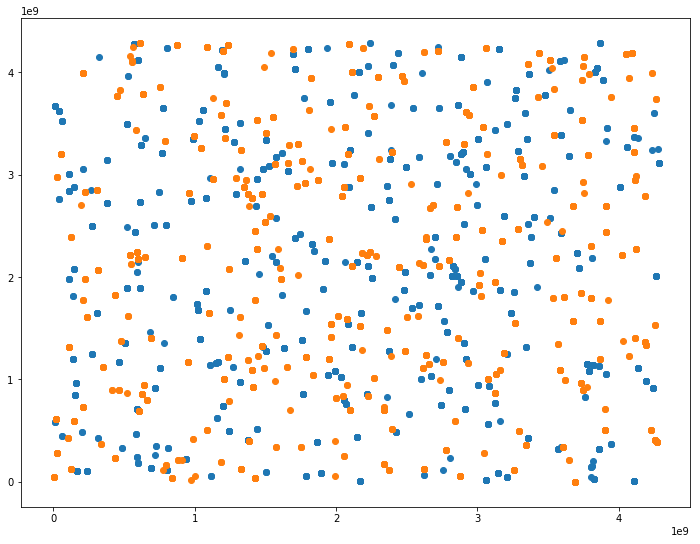

In [107]:
import math
plt.figure(figsize=(12, 9))
plt.scatter(x=df.src,y=df.dst)
plt.scatter(x=df2.src,y=df2.dst)
plt.show()

In [130]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(df)
print result

[2 2 2 ..., 2 2 2]


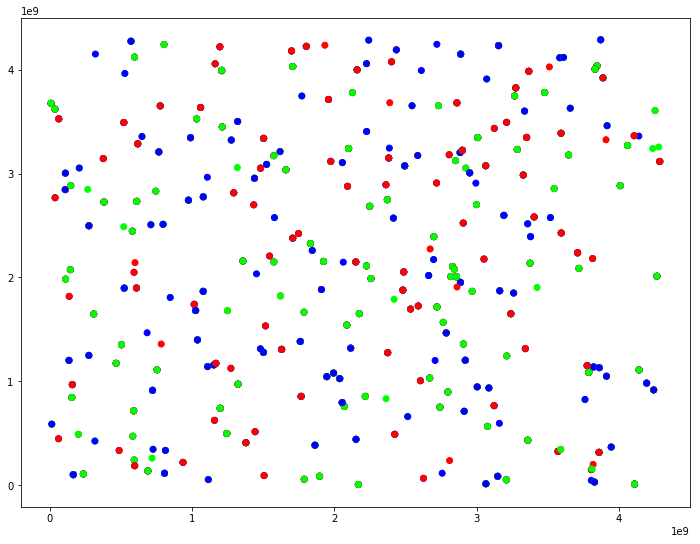

In [131]:
plt.figure(figsize=(12, 9))
color=cm.brg(np.linspace(0,1,np.max(result) - np.min(result)+1))
plt.scatter(x=df.src,y=df.dst,c=color)
plt.show()

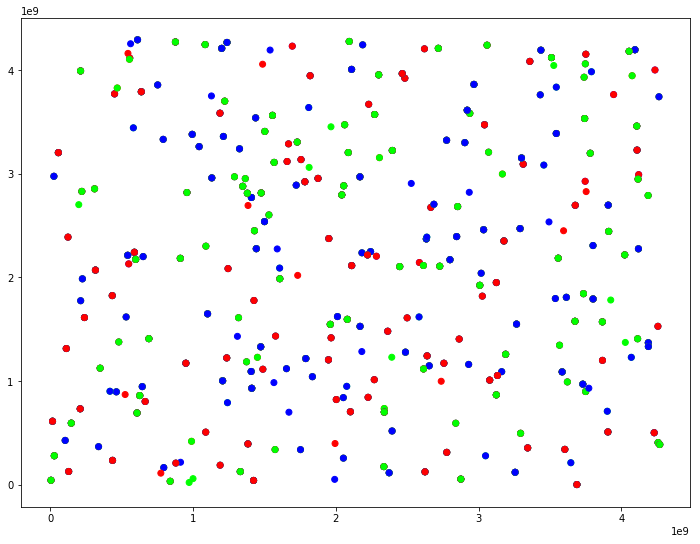

In [132]:
kmeans = KMeans(n_clusters=3)
result2 = kmeans.fit_predict(df2)
plt.figure(figsize=(12, 9))
plt.scatter(x=df2.src,y=df2.dst,c=color)
plt.show()

In [134]:
counter = 0
for i,x in enumerate(result):
    y = result2[i]
    if x == y:
        counter+=1

print counter


358


In [138]:
kmeans = KMeans(n_clusters=3)
result = kmeans.fit_predict(df)
result2 = kmeans.fit_predict(df)
counter = 0
for i,x in enumerate(result):
    y = result2[i]
    if x == y:
        counter+=1

print counter

489


In [145]:
import ipaddress

ip=ipaddress.ip_address(u'192.168.0.0')
print int(ip)

3232235520


In [147]:
ipaddress.IPv4Address(3232235520)

IPv4Address(u'192.168.0.0')

In [148]:
import ipaddress

ip=ipaddress.ip_address(u'192.168.255.255')
print int(ip)

3232301055


In [149]:
ipaddress.IPv4Address(3232301055)

IPv4Address(u'192.168.255.255')

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
df = pd.read_csv("tmp/testlog3.csv",header=None, names = ('time','src','dst','sport','dport','byte'))
df.head()


,time,src,dst,sport,dport,byte
0,1490944306,3232269516,3232283428,36391,531,28750
1,1490944306,3232288701,3232271111,63678,230,125140
2,1490944306,3232288701,3232271111,63678,230,129389
3,1490944306,3232288701,3232271111,63678,230,508542
4,1490944306,3232288701,3232271111,63678,230,354400


In [9]:
dfg = df.groupby('src')['src'].count()
dfg.head()

src
3232235586    8
3232235825    3
3232235945    9
3232236121    5
3232236252    4
Name: src, dtype: int64

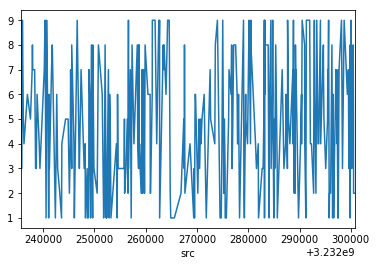

In [10]:
dfg.plot()